In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
dat = pd.read_csv('bearing_4_prediction_data.csv', index_col= 0)
dat.head()

,mean,std,rms,sf,peak_count,conf_interval_outliers,iqr_outliers,bearing_condition
0,-0.092602,0.063332,0.112187,0.507258,152,0,844,0
1,-0.089603,0.062162,0.109054,0.490841,158,8,952,0
2,-0.092852,0.062668,0.112020,0.488001,138,0,979,0
3,-0.093364,0.063190,0.112738,0.490721,170,20,886,0
4,-0.098905,0.062374,0.116930,0.508626,144,4,968,0


In [5]:
X = dat.drop('bearing_condition', axis=1)
y = dat['bearing_condition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


NameError: name 'dat' is not defined

In [4]:
    # Define hyperparameter grid for Random Forest Regression
param_grid_rf = {
   'n_estimators': [20, 50, 90],
   'max_depth': [3, 5, 8],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 4, 8]
}

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [11]:
accuracy_score(y_test,rand_search.best_estimator_.predict(X_test))

0.8927536231884058

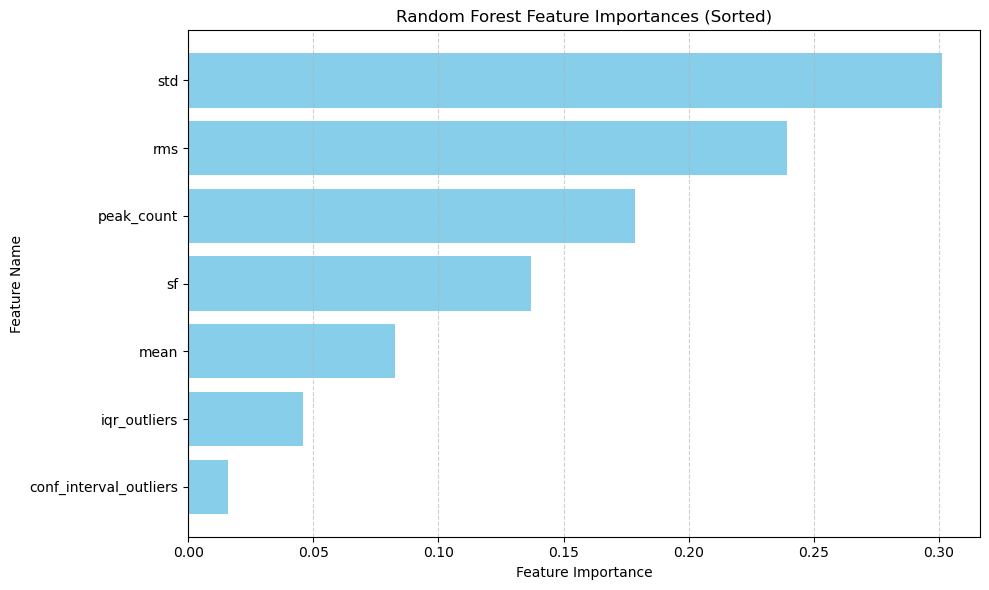

In [12]:

rf.fit(X_train, y_train)
# Get feature importances
importances = rand_search.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]
importances_sorted = importances[indices]
# Create a sorted bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(range(len(feature_names)), importances_sorted, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importances (Sorted)")
plt.yticks(range(len(feature_names)), feature_names, fontsize=10)  # Adjust font size as desired
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()